In [2]:
import pandas as pd
import joblib
from data_processing.main import read_scoreset
from tqdm import tqdm
from pathlib import Path
from data_processing.mapping_nbs import mapping_utils
from data_processing.mapping_nbs import plotting
pd.set_option('display.max_columns', 500)

dataset_name = "Mighell_PTEN_lipidPhosphataseAssay"
dataset_path = Path("/data/dzeiberg/mave_calibration/data/") / dataset_name
assert dataset_path.exists()

In [3]:
metadata, gene_info, gnomAD_df, spliceAI_df, clinvar_df = mapping_utils.load_mapping_data()

In [47]:
scoreset = pd.read_csv(dataset_path / "scoreset.csv").assign(synonymous=False)
scoreset = scoreset.assign(nonsense=scoreset.hgvs_pro.str.slice(-3) == "Ter")

In [48]:
scoreset.head()

,accession,hgvs_nt,hgvs_splice,hgvs_pro,score,SE,High_conf,A_score,A_SE,B_score,B_SE,A1_score,A1_SE,A2_score,A2_SE,A3_score,A3_SE,B1_score,B1_SE,B2_score,B2_SE,B3_score,B3_SE,author_transcript,synonymous,nonsense
0,urn:mavedb:00000054-a-1#3,c.1208_1209delinsAA,NaN,p.Val403Glu,0.193065,0.180809,1.0,0.348556,0.142215,-1.220374,0.567749,0.174396,0.183904,0.218258,0.194469,0.592867,0.150122,-2.786450,1.447358,-1.311838,0.872876,-0.559310,0.872879,NM_000314.6,False,False
1,urn:mavedb:00000054-a-1#9,c.1208_1209delinsGT,NaN,p.Val403Gly,-2.736793,0.828697,0.0,NaN,NaN,-2.736793,0.828697,NaN,NaN,0.493526,1.032800,-0.019169,1.032799,-3.238435,1.435344,-2.862236,1.435345,-2.109707,1.435347,NM_000314.6,False,False
2,urn:mavedb:00000054-a-1#15,c.1207_1209delinsTGG,NaN,p.Val403Trp,-2.459162,0.832588,0.0,NaN,NaN,-2.459162,0.832588,NaN,NaN,NaN,NaN,NaN,NaN,-2.960803,1.442084,-2.584604,1.442085,-1.832076,1.442087,NM_000314.6,False,False
3,urn:mavedb:00000054-a-1#18,c.[1207G>A;1209C>G],NaN,p.Val403Met,0.106511,0.063560,1.0,0.106511,0.063560,NaN,NaN,0.166644,0.109310,0.111688,0.119667,0.049131,0.103138,NaN,NaN,NaN,NaN,NaN,NaN,NM_000314.6,False,False
4,urn:mavedb:00000054-a-1#20,c.[1207G>A;1209C>T],NaN,p.Val403Ile,-2.049575,0.909505,0.0,NaN,NaN,-2.049575,0.909505,NaN,NaN,-0.094261,0.942814,1.429927,0.556045,-0.960285,0.351302,-3.628408,1.424000,-2.875880,1.424002,NM_000314.6,False,False


In [49]:
scoreset = scoreset.rename(columns={"hgvs_nt": "hgvs_nuc"})

In [50]:
scoreset

,accession,hgvs_nuc,hgvs_splice,hgvs_pro,score,SE,High_conf,A_score,A_SE,B_score,B_SE,A1_score,A1_SE,A2_score,A2_SE,A3_score,A3_SE,B1_score,B1_SE,B2_score,B2_SE,B3_score,B3_SE,author_transcript,synonymous,nonsense
0,urn:mavedb:00000054-a-1#3,c.1208_1209delinsAA,NaN,p.Val403Glu,0.193065,0.180809,1.0,0.348556,0.142215,-1.220374,0.567749,0.174396,0.183904,0.218258,0.194469,0.592867,0.150122,-2.786450,1.447358,-1.311838,0.872876,-0.559310,0.872879,NM_000314.6,False,False
1,urn:mavedb:00000054-a-1#9,c.1208_1209delinsGT,NaN,p.Val403Gly,-2.736793,0.828697,0.0,NaN,NaN,-2.736793,0.828697,NaN,NaN,0.493526,1.032800,-0.019169,1.032799,-3.238435,1.435344,-2.862236,1.435345,-2.109707,1.435347,NM_000314.6,False,False
2,urn:mavedb:00000054-a-1#15,c.1207_1209delinsTGG,NaN,p.Val403Trp,-2.459162,0.832588,0.0,NaN,NaN,-2.459162,0.832588,NaN,NaN,NaN,NaN,NaN,NaN,-2.960803,1.442084,-2.584604,1.442085,-1.832076,1.442087,NM_000314.6,False,False
3,urn:mavedb:00000054-a-1#18,c.[1207G>A;1209C>G],NaN,p.Val403Met,0.106511,0.063560,1.0,0.106511,0.063560,NaN,NaN,0.166644,0.109310,0.111688,0.119667,0.049131,0.103138,NaN,NaN,NaN,NaN,NaN,NaN,NM_000314.6,False,False
4,urn:mavedb:00000054-a-1#20,c.[1207G>A;1209C>T],NaN,p.Val403Ile,-2.049575,0.909505,0.0,NaN,NaN,-2.049575,0.909505,NaN,NaN,-0.094261,0.942814,1.429927,0.556045,-0.960285,0.351302,-3.628408,1.424000,-2.875880,1.424002,NM_000314.6,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8007,urn:mavedb:00000054-a-1#8669,c.1_3delinsTGT,NaN,p.Met1Cys,1.181219,0.298849,1.0,NaN,NaN,1.181219,0.298849,NaN,NaN,NaN,NaN,NaN,NaN,0.583450,0.394800,1.632270,0.418682,1.333904,0.344656,NM_000314.6,False,False
8008,urn:mavedb:00000054-a-1#8674,c.1_2delinsTG,NaN,p.Met1Trp,-1.300060,0.432320,1.0,NaN,NaN,-1.300060,0.432320,NaN,NaN,NaN,NaN,NaN,NaN,-0.824046,0.429695,-2.205445,1.432110,-1.781877,0.580532,NM_000314.6,False,False
8009,urn:mavedb:00000054-a-1#8675,c.1_3delinsTAT,NaN,p.Met1Tyr,-0.872034,0.286561,1.0,-1.100501,0.539142,-0.812891,0.409667,-3.003794,1.440035,-0.563236,0.477435,-1.375100,0.860684,-3.003829,1.444500,-0.578965,0.868147,-0.634770,0.490737,NM_000314.6,False,False
8010,urn:mavedb:00000054-a-1#8678,c.1A>T,NaN,p.Met1Leu,-1.545614,0.883483,0.0,NaN,NaN,-1.545614,0.883483,NaN,NaN,NaN,NaN,NaN,NaN,-3.087210,1.442090,-0.151521,0.692861,-2.184489,0.864111,NM_000314.6,False,False


In [51]:
if 'author_transcript' not in scoreset.columns or scoreset.author_transcript.isna().all():
    AUTHOR_TRANSCRIPT = gene_info.loc[metadata.loc[dataset_name],'MANE_RefSeq_nuc'].values[0].split(".")[0]
else:
    AUTHOR_TRANSCRIPT = scoreset.author_transcript.iloc[0].split(".")[0]

In [54]:
AUTHOR_TRANSCRIPT

'NM_000314'

In [55]:
clinvar_nuc_summaries = clinvar_df[(clinvar_df.transcript_base == AUTHOR_TRANSCRIPT) & (clinvar_df.hgvs_nuc.isin(scoreset.hgvs_nuc))].groupby("hgvs_nuc").apply(mapping_utils.summarize_clinvar_group)

/tmp/ipykernel_2978042/3958393697.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  clinvar_nuc_summaries = clinvar_df[(clinvar_df.transcript_base == AUTHOR_TRANSCRIPT) & (clinvar_df.hgvs_nuc.isin(scoreset.hgvs_nuc))].groupby("hgvs_nuc").apply(mapping_utils.summarize_clinvar_group)


In [56]:
scoreset.set_index("hgvs_nuc", inplace=True)

In [57]:
scoreset_w_clinvar = pd.merge(scoreset,clinvar_nuc_summaries,
                            left_index=True,
                            right_index=True,
                            how="left",
                            validate="one_to_one",
                            suffixes=("","_clinvar"))

In [58]:
scoreset_w_clinvar.shape[0]

8012

In [59]:
scoreset_w_clinvar[scoreset_w_clinvar.num_p_lp > 0].shape

(133, 32)

In [60]:
scoreset_w_clinvar[scoreset_w_clinvar.num_b_lb > 0].shape

(1, 32)

# Add gnomAD annotations

In [61]:
Ensembl_transcript_stable_ids = mapping_utils.translate_refseq_to_ensembl(AUTHOR_TRANSCRIPT)

In [62]:
Ensembl_transcript_stable_ids

array(['ENST00000644628', 'ENST00000371953'], dtype=object)

In [63]:
gnomAD_df = gnomAD_df.assign(hgvs_nuc=gnomAD_df.HGVSc.str.split(":").str[1]).set_index("hgvs_nuc")

In [64]:
gnomAD_matches = gnomAD_df[(gnomAD_df.index.isin(scoreset.index)) & \
                            (gnomAD_df.Feature_base.isin(set(Ensembl_transcript_stable_ids).union(set((AUTHOR_TRANSCRIPT,)))))].sort_values(by='AC',ascending=False)

gnomAD_matches_unique = gnomAD_matches[~gnomAD_matches.index.duplicated(keep='first')]

In [65]:
gnomAD_matches.shape[0], gnomAD_matches_unique.shape[0]

(220, 101)

In [66]:
scoreset_processed = pd.merge(scoreset_w_clinvar,gnomAD_matches_unique,
                                        left_index=True,right_index=True,how="left",validate="one_to_one")#.reset_index()

In [67]:
scoreset_processed.shape

(8012, 88)

In [68]:
scoreset_processed[scoreset_processed.AC >= 1]

,accession,hgvs_splice,hgvs_pro_x,score,SE,High_conf,A_score,A_SE,B_score,B_SE,A1_score,A1_SE,A2_score,A2_SE,A3_score,A3_SE,B1_score,B1_SE,B2_score,B2_SE,B3_score,B3_SE,author_transcript,synonymous,nonsense,num_p_lp,num_b_lb,num_conflicting,num_VUS,clinvar_names,clinvar_records,clinvar_spliceAI_max,ID,QUAL,FILTER,AC,AF,vep,index,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,EXON,INTRON,HGVSc,HGVSp,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,ALLELE_NUM,DISTANCE,STRAND,FLAGS,VARIANT_CLASS,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,MANE_PLUS_CLINICAL,TSL,APPRIS,CCDS,ENSP,UNIPROT_ISOFORM,SOURCE,DOMAINS,miRNA,HGVS_OFFSET,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS,LoF,LoF_filter,LoF_flags,LoF_info,hgvs_pro_y,Feature_base,spliceAI_scores
hgvs_nuc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
c.1180G>A,urn:mavedb:00000054-a-1#122,NaN,p.Glu394Lys,0.335854,0.398747,1.0,-0.534880,0.129779,1.222947,0.070133,-0.713349,0.244131,-0.605087,0.254705,-0.384893,0.191812,1.263395,0.110214,1.279428,0.116442,1.064250,0.145507,NM_000314.6,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs2132290234,-10.0,PASS,1.0,6.851990e-07,A|missense_variant|MODERATE|PTEN|ENSG000001718...,22539.0,A,missense_variant,MODERATE,PTEN,ENSG00000171862,Transcript,ENST00000371953,protein_coding,9/9,NaN,ENST00000371953.8:c.1180G>A,ENSP00000361021.3:p.Glu394Lys,2025.0,1180.0,394.0,E/K,Gaa/Aaa,1.0,NaN,1.0,NaN,SNV,HGNC,HGNC:9588,YES,NM_000314.8,NaN,1.0,P1,CCDS31238.1,ENSP00000361021,P60484-1,Ensembl,ENSP_mappings:2kyl&PANTHER:PTHR12305&PANTHER:P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Glu394Lys,ENST00000371953,0.00
c.1171C>T,urn:mavedb:00000054-a-1#195,NaN,p.Pro391Ser,-0.115868,0.097930,1.0,-0.110396,0.163025,-0.126651,0.136682,0.187734,0.121654,-0.368973,0.160780,-0.183378,0.124440,0.064762,0.146958,-0.345133,0.189045,-0.175210,0.237237,NM_000314.6,False,False,0.0,0.0,0.0,1.0,NM_000314.8(PTEN):c.1171C>T (p.Pro391Ser),1.0,0.00,rs786203911,-10.0,PASS,43.0,2.945800e-05,T|missense_variant|MODERATE|PTEN|ENSG000001718...,22536.0,T,missense_variant,MODERATE,PTEN,ENSG00000171862,Transcript,ENST00000371953,protein_coding,9/9,NaN,ENST00000371953.8:c.1171C>T,ENSP00000361021.3:p.Pro391Ser,2016.0,1171.0,391.0,P/S,Cct/Tct,1.0,NaN,1.0,NaN,SNV,HGNC,HGNC:9588,YES,NM_000314.8,NaN,1.0,P1,CCDS31238.1,ENSP00000361021,P60484-1,Ensembl,ENSP_mappings:2kyl&PANTHER:PTHR12305&PANTHER:P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Pro391Ser,ENST00000371953,0.00
c.1166A>C,urn:mavedb:00000054-a-1#236,NaN,p.Asn389Thr,0.310104,0.214358,1.0,-0.074428,0.163470,0.696646,0.221403,-0.427280,0.183427,0.131179,0.161311,0.033082,0.140681,0.694361,0.128013,0.307501,0.154114,1.087242,0.152927,NM_000314.6,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs1860738514,-10.0,PASS,1.0,6.571940e-06,C|missense_variant|MODERATE|PTEN|ENSG000001718...,22534.0,C,missense_variant,MODERATE,PTEN,5728,Transcript,NM_000314.8,protein_coding,9/9,NaN,NM_000314.8:c.1166A>C,NP_000305.3:p.Asn389Thr,2011.0,1166.0,389.0,N/T,aAt/aCt,1.0,NaN,1.0,NaN,SNV,EntrezGene,HGNC:9588,YES,ENST00000371953.8,NaN,NaN,NaN,NaN,NP_000305.3,NaN,RefSeq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Asn389Thr,NM_000314,0.00
c.1130A>T,urn:mavedb:00000054-a-1#389,NaN,p.Tyr377Phe,0.035690,0.069392,1.0,0.084493,0.113377,-0.008433,0.096653,0.133521,0.085757,0.253235,0.088420,-0.130247,0.084688,-0.179638,0.060159,0.140112,0.061222,0.017869,0.083678,NM_000314.6,False,False,0.0,0.0,0.0,1.0,NM_000314.8(PTEN):c.1130A>T (p.Tyr377Phe),1.0,0.00,rs751286806,-10.0,PASS,26.0,1.781670e-05,T|missense_variant|MODERATE|PTEN|ENSG000001718...,22525.0,T,missense_variant,MODERATE,PTEN,ENSG00000171862,Transcript,ENST00000371953,protein_coding,9/9,NaN,ENST00000371953.8:c.1130A>T,ENSP00000361021.3:p.Tyr377Phe,1975.0,1130.0,377.0,Y/F,tAt/tTt,1.0,NaN,1.0,NaN,SNV,HGNC,HGNC:9588,YES,NM_000314.8,NaN,1.0,P1,CCDS31238.1,ENSP00000361021,P60484-1,Ensembl,PANTHER:PTH

In [69]:
def conflicting_interpretations(r):
    """
    Check if a record has conflicting interpretations
    P/LP and B/LB ; P/LP and VUS ; B/LB and VUS ; P/LP and conflicting ; B/LB and conflicting
    If data is mapped at the protein level, this could be a result of different RNA substitutions
    If data is mapped at the RNA level, this is a true conflict

    Parameters
    ----------
    r : pd.Series
        A record from the ClinVar data frame

    Returns
    -------
    bool
        True if there are conflicting interpretations, False otherwise
    """
    return r.num_p_lp > 0 and r.num_b_lb > 0 or \
            r.num_p_lp > 0 and r.num_VUS > 0 or \
            r.num_b_lb > 0 and r.num_VUS > 0 or \
            r.num_p_lp > 0 and r.num_conflicting > 0 or \
            r.num_b_lb > 0 and r.num_conflicting > 0


def is_pathogenic(r):
    return r.num_p_lp > 0 and not conflicting_interpretations(r) and r.clinvar_spliceAI_max <= .5

def is_benign(r):
    return r.num_b_lb > 0 and not conflicting_interpretations(r) and r.clinvar_spliceAI_max <= .5

def is_vus(r):
    return r.num_VUS > 0

def is_conflicting(r):
    return r.num_conflicting > 0

def is_gnomAD(r):
    return r.AF > 0 and r.spliceAI_scores <= .5

def is_synonymous(r):
    return r.synonymous and r.num_p_lp == 0 and r.clinvar_spliceAI_max <= .5



In [70]:
INVERT_SCORES = False

sample_data = {
    "P/LP" : scoreset_processed[scoreset_processed.apply(lambda r: not r.nonsense and is_pathogenic(r),axis=1)],
    "B/LB" : scoreset_processed[scoreset_processed.apply(lambda r: not r.nonsense and is_benign(r),axis=1)],
    'gnomAD': scoreset_processed[scoreset_processed.apply(lambda r: not r.nonsense and is_gnomAD(r),axis=1)],
    'synonymous' : scoreset_processed[scoreset_processed.apply(is_synonymous,axis=1)],
}
sample_data = {k : v for k,v in sample_data.items() if len(v)}

if INVERT_SCORES:
    for k in sample_data:
        sample_data[k] = sample_data[k].assign(score= -sample_data[k].score)


In [71]:
for sample_name, sample in sample_data.items():
    print(f"{sample_name}: {sample.shape[0]}")

P/LP: 84
B/LB: 1
gnomAD: 100


(<Figure size 1200x900 with 3 Axes>,
 array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>], dtype=object))

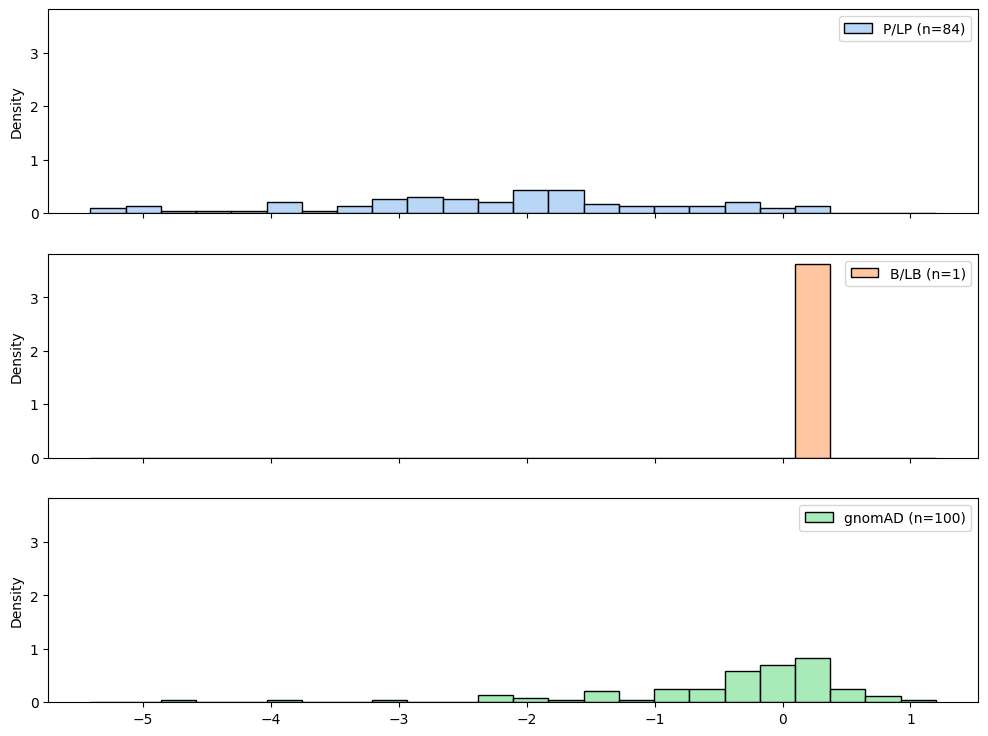

In [72]:
plotting.plot_samples({k : v.score.values for k,v in sample_data.items()})

In [39]:
# if "synonymous" in sample_data:
#     pd.DataFrame.from_records([*[dict(sample_name='P/LP',score=score) for score in sample_data['P/LP'].score.values],
#                                 *[dict(sample_name='B/LB',score=score) for score in sample_data['B/LB'].score.values],
#                                 *[dict(sample_name='gnomAD',score=score) for score in sample_data['gnomAD'].score.values],
#                                 *[dict(sample_name='synonymous',score=score) for score in sample_data['synonymous'].score.values]]).to_csv(dataset_path / "samples.csv",index=False)
# else:
#     pd.DataFrame.from_records([*[dict(sample_name='P/LP',score=score) for score in sample_data['P/LP'].score.values],
#                                 *[dict(sample_name='B/LB',score=score) for score in sample_data['B/LB'].score.values],
#                                 *[dict(sample_name='gnomAD',score=score) for score in sample_data['gnomAD'].score.values]]).to_csv(dataset_path / "samples.csv",index=False)v

In [73]:
old = joblib.load(dataset_path / "hgvs_pro.pkl")

In [81]:
clinvar_nuc_summaries[clinvar_nuc_summaries.clinvar_names.str.split("(",regex=False).str[-1].str.slice(0,-1).isin(set(old['p_lp'].values) - set(sample_data['P/LP'].hgvs_pro_x.values))]

,num_p_lp,num_b_lb,num_conflicting,num_VUS,clinvar_names,clinvar_records,clinvar_spliceAI_max
hgvs_nuc,,,,,,,
c.723T>G,0,0,1,0,NM_000314.8(PTEN):c.723T>G (p.Phe241Leu),1,0.12
c.801G>T,0,0,1,0,NM_000314.8(PTEN):c.801G>T (p.Lys267Asn),1,0.41
c.929A>G,1,0,0,0,NM_000314.8(PTEN):c.929A>G (p.Asp310Gly),1,0.96


In [82]:
clinvar_nuc_summaries[clinvar_nuc_summaries.clinvar_names.str.split("(",regex=False).str[-1].str.slice(0,-1).isin(set(old['b_lb'].values) - set(sample_data['B/LB'].hgvs_pro_x.values))]

,num_p_lp,num_b_lb,num_conflicting,num_VUS,clinvar_names,clinvar_records,clinvar_spliceAI_max
hgvs_nuc,,,,,,,
